In [9]:
VOCAB_SIZE = 300
SEQ_LEN = 100

In [10]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=VOCAB_SIZE)

In [11]:
train_input, test_input = train_input[:10000],  test_input[:5000]
train_target, test_target = train_target[:10000],  test_target[:5000]

In [12]:
# padding 처리 (동일한 길이)
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=SEQ_LEN)
test_seq = pad_sequences(test_input, maxlen=SEQ_LEN)

In [13]:
# one-hot encoding
from tensorflow.keras.utils import to_categorical

train_onehot = to_categorical(train_seq)
test_onehot = to_categorical(test_seq)

### 모델 준비 및 학습

In [14]:
from tensorflow.keras import models, layers, callbacks, optimizers

input = layers.Input(shape=(SEQ_LEN, VOCAB_SIZE))
x = layers.SimpleRNN(units=8)(input)
output = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(input, output)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 100, 300)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 8)                   │           2,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.4997 - loss: 0.7010 - val_accuracy: 0.5235 - val_loss: 0.6911 - learning_rate: 0.0010
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5779 - loss: 0.6758 - val_accuracy: 0.6240 - val_loss: 0.6544 - learning_rate: 0.0010
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6614 - loss: 0.6348 - val_accuracy: 0.7020 - val_loss: 0.5975 - learning_rate: 0.0010
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7171 - loss: 0.5834 - val_accuracy: 0.7340 - val_loss: 0.5599 - learning_rate: 0.0010
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7342 - loss: 0.5537 - val_accuracy: 0.7355 - val_loss: 0.5508 - learning_rate: 0.0010
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7525 - loss: 0.5311 - val_accuracy: 0.7220 - val_loss: 0.5563 - learning_rate: 0.0010
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7554 - l

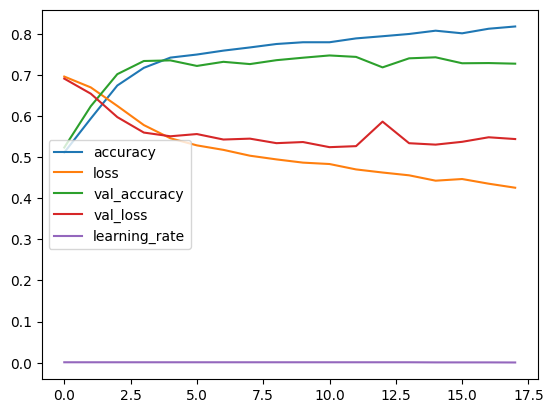

In [15]:
from functools import reduce
# 컴파일 및 학습
import pandas as pd
import matplotlib.pyplot as plt

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

ealy_stopping_cd = callbacks.EarlyStopping(patience=7, restore_best_weights=True, verbose=1)
reduce_lr_on_plateau_cb = callbacks.ReduceLROnPlateau(patience=3, factor=0.7, verbose=1)

history = model.fit(
    train_onehot,
    train_target,
    epochs=100,
    batch_size=65,
    validation_split=0.2,
    callbacks=[ealy_stopping_cd, reduce_lr_on_plateau_cb]
)

history_df = pd.DataFrame(history.history)
history_df.plot()
plt.show()

In [16]:
loss, accuracy = model.evaluate(test_onehot, test_target)
print(f'loss: {loss:.4f}, accuracy: {accuracy:.4f}')

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7416 - loss: 0.5538
loss: 0.5571, accuracy: 0.7356
